In [1]:
print("Welcome")

Welcome


In [3]:
import os

os.listdir('/kaggle/input/bbc-news-summary/BBC News Summary')

['Summaries', 'News Articles']

In [4]:
# Simple way to read the dataset

dataset_link = '/kaggle/input/bbc-news-summary/BBC News Summary'

# Dataset have various types of news
# business, entertainment, politics, sports, tech
categories = ['business','entertainment','politics','sport','tech']

data = []
missing_files_count = 0

for category in categories:

    print(f"Reading articles-summaries of {category}")

    prefix = dataset_link + '/News Articles/' + category
    prefix2 = dataset_link + '/Summaries/' + category
    
    file_names = os.listdir(prefix)
    print(len(file_names))
    
    for file in file_names:
        try:
            with open(prefix + '/' + file,'r') as f:
                article = f.read()
            
            with open(prefix2 + '/' + file,'r') as f:
                summary = f.read()
        
            data.append([article,summary])
            
        except:
            missing_files_count += 1

Reading articles-summaries of business
510
Reading articles-summaries of entertainment
386
Reading articles-summaries of politics
417
Reading articles-summaries of sport
511
Reading articles-summaries of tech
401


In [5]:
missing_files_count

1

In [6]:
len(data)

2224

In [7]:
import pandas as pd

df = pd.DataFrame(data, columns=['article','summary'])

In [8]:
df.head()

,article,summary
0,US consumer confidence up\n\nConsumers' confid...,"Wal-Mart, the largest US retailer, has said it..."
1,The 'ticking budget' facing the US\n\nThe budg...,Brute force budget cuts or spending caps would...
2,Mitsubishi in Peugeot link talks\n\nTrouble-hi...,Trouble-hit Mitsubishi Motors is in talks with...
3,BMW reveals new models pipeline\n\nBMW is prep...,Typically it takes about three years from when...
4,World leaders gather to face uncertainty\n\nMo...,"More than 2,000 business and political leaders..."


In [9]:
df.describe()

,article,summary
count,2224,2224
unique,2126,2080
top,Microsoft makes anti-piracy move\n\nMicrosoft ...,"Viotti, director of La Fenice since 2002, cond..."
freq,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  2224 non-null   object
 1   summary  2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [11]:
# let's see a sample

samples = df.sample(n=3, random_state=42)


for row in samples.itertuples():
    print(row[1])
    print("-------------")
    print(row[2])
    print("***************")

Consumer spending lifts US growth

US economic growth accelerated in the third quarter, helped by strong consumer spending, official figures have shown.

The economy expanded at an annual rate of 3.7% in the July to September period, the Commerce Department said. The figure marked an increase on the 3.3% growth recorded in the second quarter, but fell short of the 4.2% rate pencilled in by forecasters. The increase reflected the biggest jump in consumer spending in a year. "It was a little softer than the consensus, but not a real surprise," said Gary Thayer, an economist at AG Edwards & Sons. Friday's growth estimate is one of the last significant pieces of economic data before the 2 November presidential election.

Democrat challenger John Kerry has criticised President George W Bush's handling of the economy, pointing to a net loss of over 800,000 jobs since Mr Bush took office. Analysts said the economy was still not growing fast enough to stimulate large-scale job creation. "It's 

In [12]:
length_article = []
length_summary = []

for row in df.itertuples():
    length_article.append(len(row[1].split(' ')))
    length_summary.append(len(row[2].split(' ')))

In [13]:
print(f"Maximum number of words in articles: {max(length_article)}")
print(f"Maximum number of words in articles: {max(length_summary)}")

print(f"Minimum number of words in articles: {min(length_article)}")
print(f"Minimum number of words in articles: {min(length_summary)}")

Maximum number of words in articles: 4377
Maximum number of words in articles: 2074
Minimum number of words in articles: 87
Minimum number of words in articles: 38


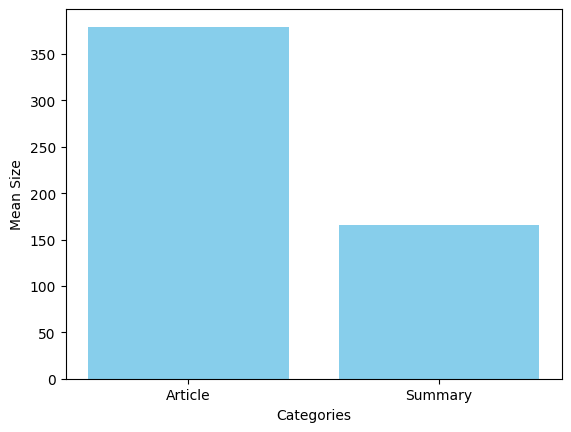

In [14]:
import matplotlib.pyplot as plt
means = [sum(length_article)/len(length_article),sum(length_summary)/len(length_summary)]

plt.bar(["Article","Summary"], means , color='skyblue')

plt.xlabel('Categories')
plt.ylabel('Mean Size')

plt.show()

In [15]:
df.to_csv('news_summaries.csv',index=False)

In [16]:
# let us create huggingface dataset

from datasets import load_dataset

dataset = load_dataset('csv',data_files='/kaggle/working/news_summaries.csv',split='train')

Generating train split: 0 examples [00:00, ? examples/s]

In [17]:
dataset

Dataset({
    features: ['article', 'summary'],
    num_rows: 2224
})

In [18]:
split_dataset = dataset.train_test_split(test_size=0.1)

In [19]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'summary'],
        num_rows: 2001
    })
    test: Dataset({
        features: ['article', 'summary'],
        num_rows: 223
    })
})

In [31]:
from huggingface_hub import notebook_login

notebook_login()

In [32]:
from huggingface_hub import whoami

whoami()

{'type': 'user',
 'id': '66a797b589b3e71262932d0d',
 'name': 'SurAyush',
 'fullname': 'Ayush Sur',
 'email': 'ayushsur26@gmail.com',
 'emailVerified': True,
 'canPay': False,
 'periodEnd': None,
 'isPro': False,
 'avatarUrl': 'https://cdn-avatars.huggingface.co/v1/production/uploads/noauth/RZJZW_w0wdVoOmQY250lR.png',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'Token_31',
   'role': 'write',
   'createdAt': '2025-03-31T12:13:22.966Z'}}}

In [82]:
from huggingface_hub import HfApi

def upload_dataset_to_hf(file_path, repo_id):
    """
    Uploads a dataset to the Hugging Face Hub.
    """
    
    api = HfApi()

    # Create repo (if it doesn’t exist)
    api.create_repo(repo_id, repo_type="dataset", exist_ok=True)
    
    api.create_repo(repo_id, repo_type="dataset", exist_ok=True)
    
    # Upload file
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo= os.path.basename(file_path),
        repo_id=repo_id,
        repo_type="dataset"
    )
    print(f"Dataset uploaded successfully to https://huggingface.co/datasets/{repo_id}")

# Example usage:
upload_dataset_to_hf("/kaggle/working/news_summaries.csv", "SurAyush/News_Summary_Dataset")


Dataset uploaded successfully to https://huggingface.co/datasets/SurAyush/News_Summary_Dataset
